### Thinkful Capstone 3 | **Vending Machine Analysis**
#### *Author: Ford Johnson*
<br>

> "*C W Mills in the Sociological Imagination says sociology lies at the intersection of history and biography. People and the Past. What a great location. **Mills says to think sociologically is about making the familiar strange.** This requires thinking critically about the social world. Adopting a different way of seeing. Challenging conventional wisdom.*"
>
>\- Sue Watling, PhD


<br>
Vending machines are all around us in our daily lives and they provide a convenient way to get a snack or beverage. However vending machines are not just filled without a specific logic or reason. The reason I wanted to look at vending machine data was to make something that seems so familiar such as vending machines...strange. Doing so to understand this from a both a customer's and stakeholder's persepective, with a data-driven approach.
<br>
<br>
<a href="https://www.kaggle.com/datasets/awesomeasingh/vending-machine-sales">Click here</a> to view the dataset on Kaggle.
<br>
<br>

### **Data Overview**
> **Data Date Range:** `1/1/2022 - 8/31/2022`
>
> **Number of Vending Machines:** `5`
>
> **Number of Locations:** `4`
>
> **Number of product categories:** `4`
>
> **Number of products:** `162`
>
> **Number of transactions:** `6445`


### Import Python Libraries and load data

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

# read csv
df = pd.read_csv("/content/gdrive/MyDrive/colab-datasets/vending_machine_sales.csv")

Mounted at /content/gdrive


### Global Data Cleaning

In [ ]:
# data cleaning
# df.info()
df = df.dropna()

### Data Overview

In [ ]:
total_overview = df.groupby("Category").sum()[['RPrice']]
total_overview['Total Revenue'] = total_overview['RPrice']
total_overview = total_overview.drop(['RPrice'], axis=1)
print(total_overview)

                Total Revenue
Category                     
Carbonated            3371.50
Food                  5835.25
Non Carbonated        1811.25
Water                  893.25


## Findings

### Hypothesis #1
The average revenue per drink for carbonated drinks is **significantly higher** than non-carbonated drinks.
> Assuming there is equal demand (purchases) among the two categories

14.522678813161257 7.95456326451125e-46
AxesSubplot(0.125,0.125;0.775x0.755)


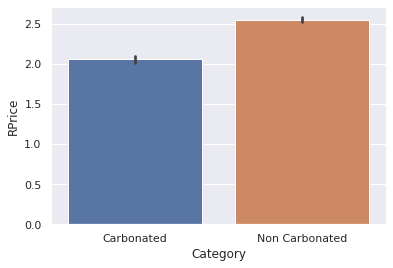

In [ ]:
# create data frames for carbonated and non-carbonated categories
df_carb = df.loc[df['Category'] == 'Carbonated']
df_noncarb = df.loc[df['Category'] == 'Non Carbonated']

# conduct t-test to test for signif
tc, pc = ttest_ind(df_noncarb['RPrice'], df_carb['RPrice'])
print(tc, pc)

# context 
from numpy import mean
t_1 = df[df['Category'].isin(['Carbonated', 'Non Carbonated'])]
h_1 = sns.barplot(x = 'Category', y = 'RPrice', data = t_1, estimator = mean)
print(h_1)

### Hypothesis #1 Summary
- The above bar chart shows the average revenue per product for both carbonated and non-carbonated beverages
- However, the non-carbonated drinks cost more on average than their carbonated counterparts, so therefore I **reject hypothesis #1**
 - This is a significant difference at a 95% confidence level | p < .01 

<br>
Because non-carbonated drinks are more expensive but have less total revenue than carbonated drinks that would mean carbonated drinks are bought more often...

In [ ]:
# get counts for carbonated and non-carbonated drinks
count_overview = t_1.groupby("Category").count()[['RPrice']]
count_overview['Total Sold'] = count_overview['RPrice']
count_overview = count_overview.drop(['RPrice'], axis=1)
print(count_overview)

                Total Sold
Category                  
Carbonated            1639
Non Carbonated         710


#### **Carbonated Vs Non-carbonated**
We know that non-carbonated on average makes more revenue than carbonated drinks, but carbonated drinks are sold more. With many different options, and limited space for drinks in the vending machines, we need to optimize the product selection.
<br>

*This begs the question...* 

**What are the most popular carbonated drinks out of the 16 options?** 
> I can easily find this out by looking at only carbonated drinks and sorting this df descending by count

##### **Carbonated Drinks** | 16 Total Products



In [ ]:
# create df filtered for only carbonated drinks
carbonated_df = df.loc[df['Category'] == 'Carbonated']

# get counts for each product 
carb_count_overview = carbonated_df.groupby('Product').count()[['RPrice']]
carb_count_overview['Total Sold'] = carb_count_overview['RPrice']
carb_count_overview = carb_count_overview.drop(['RPrice'], axis=1)
carb_count_overview = carb_count_overview.sort_values(by = 'Total Sold', ascending=False)

# all total options (16 total)
print(carb_count_overview)

carb_top_5 = carb_count_overview.head()

carb_bottom_11 = carb_count_overview.tail(11)

                                               Total Sold
Product                                                  
Coca Cola - Zero Sugar                                517
Monster Energy Original                               385
Sunkist Soda - Orange                                 217
Red Bull - Original                                   157
Coca Cola - Regular                                   155
Starbucks Refresher - Real Coconut Water               53
Spindrift - Sparkling Water - Pineapple                51
Keto Krisp - Almond Butter                             27
Spindrift - Sparkling Water  Lime                      22
Red Bull - Energy Drink - Sugar Free                   21
Keto Krisp - Almond/Chocolate                          15
Bubly - Cherry                                          5
Bubly - Mango                                           5
Monster Energy  Zero Ultra                              4
S. Pellegrino Essenza Mineral Water - Blood O           3
Remedy Kombuch

##### **Top 5 Carbonated Drinks Overall**

These are the top 5 carbonated drinks and they also all have over 100 purchases, and they are the main carbonated drinks you should be stocking in these locations

In [ ]:
print(carb_top_5)

                         Total Sold
Product                            
Coca Cola - Zero Sugar          517
Monster Energy Original         385
Sunkist Soda - Orange           217
Red Bull - Original             157
Coca Cola - Regular             155


##### **Bottom 11 Carbonated Drinks Overall**
These are the drinks that should be reconsidered, especially the ones with less than 30 sold, as they are taking up space in the machines and not frequently bought.

In [ ]:
print(carb_bottom_11)

                                               Total Sold
Product                                                  
Starbucks Refresher - Real Coconut Water               53
Spindrift - Sparkling Water - Pineapple                51
Keto Krisp - Almond Butter                             27
Spindrift - Sparkling Water  Lime                      22
Red Bull - Energy Drink - Sugar Free                   21
Keto Krisp - Almond/Chocolate                          15
Bubly - Cherry                                          5
Bubly - Mango                                           5
Monster Energy  Zero Ultra                              4
S. Pellegrino Essenza Mineral Water - Blood O           3
Remedy Kombucha - Ginger Lemon                          2


##### **Non-carbonated Drinks** | 24 Total Products

In [ ]:
# create df filtered for only non-carbonated drinks
non_carbonated_df = df.loc[df['Category'] == 'Non Carbonated']

# get counts for each product 
non_carb_count_overview = non_carbonated_df.groupby('Product').count()[['RPrice']]
non_carb_count_overview['Total Sold'] = non_carb_count_overview['RPrice']
non_carb_count_overview = non_carb_count_overview.drop(['RPrice'], axis=1)
non_carb_count_overview = non_carb_count_overview.sort_values(by = 'Total Sold', ascending=False)

# all total options
print(non_carb_count_overview)

                                            Total Sold
Product                                               
Snapple Diet Tea - Peach Tea                       109
Snapple Diet Tea - Lemon                            88
Snapple Tea - Raspberry                             79
Starbucks Doubleshot Energy - Mocha                 74
Iberia Coconut Water                                72
Snapple Tea - Lemon                                 51
Bai Antioxidant - Tanzania Lemon Super Tea          33
Snapple Tea - Peach                                 31
Snapple Diet Tea - Raspberry                        28
V8 Vegetable Juice - Original                       27
BodyArmor  LYTE - Blueberry Pomegranate             23
Bai Antioxidant - Molokai Coconut                   12
Bai Antioxidant - Zambia Bingcherry                 11
Bai Lemonade - Burundi Blueberry                    10
Honest Tea - Berry Hibiscus                         10
Bai Antioxidant - Kupang strawberry kiwi            10
Snapple Le

##### **Top 5 Non-Carbonated Drinks Overall**

These are the top 5 non-carbonated drinks and they also all have over 70 purchases, and they are the main non-carbonated drinks you should be stocking in these locations

In [ ]:
print(non_carb_count_overview.head())

                                     Total Sold
Product                                        
Snapple Diet Tea - Peach Tea                109
Snapple Diet Tea - Lemon                     88
Snapple Tea - Raspberry                      79
Starbucks Doubleshot Energy - Mocha          74
Iberia Coconut Water                         72


##### **Bottom 19 Non-Carbonated Drinks Overall**
These non-carbonated drinks are not as popular in these locations and they need to be reconsidered, if there is space for more non-carbonated drinks then the most popular of this table should be given the most consideration. (Top 3-5)

In [ ]:
print(non_carb_count_overview.tail(19))

                                            Total Sold
Product                                               
Snapple Tea - Lemon                                 51
Bai Antioxidant - Tanzania Lemon Super Tea          33
Snapple Tea - Peach                                 31
Snapple Diet Tea - Raspberry                        28
V8 Vegetable Juice - Original                       27
BodyArmor  LYTE - Blueberry Pomegranate             23
Bai Antioxidant - Molokai Coconut                   12
Bai Antioxidant - Zambia Bingcherry                 11
Bai Lemonade - Burundi Blueberry                    10
Honest Tea - Berry Hibiscus                         10
Bai Antioxidant - Kupang strawberry kiwi            10
Snapple Lemonade - black berry                       8
Snapple Lemonade - pineapple                         8
Snapple Lemonade - watermelon                        8
Zevia Zero Calorie Energy - Mango Ginger             6
Bai Antioxidant - Kula Watermelon                    5
Bai Antiox

### Hypothesis #2
The average revenue per carbonated drink is **significantly higher** than for water.
> Assuming there is equal demand (purchases) among the two categories

-5.038787638137021 5.081582172672138e-07
AxesSubplot(0.125,0.125;0.775x0.755)


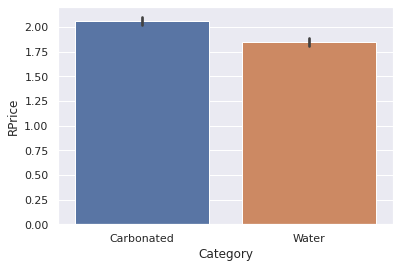

In [ ]:
# create data frames for carbonated and water categories
# df_carb = df.loc[df['Category'] == 'Carbonated']
df_water = df.loc[df['Category'] == 'Water']

# conduct t-test to test for signif
tc2, pc2 = ttest_ind(df_water['RPrice'], df_carb['RPrice'])
print(tc2, pc2)

# context 
from numpy import mean
t_2 = df[df['Category'].isin(['Carbonated', 'Water'])]
h_2 = sns.barplot(x = 'Category', y = 'RPrice', data = t_2, estimator = mean)
print(h_2)

### Hypothesis #2 Summary
- The above bar chart shows the average revenue per product for both carbonated and water beverages
- **Hypothesis #2 is retained** as the average revenue per cabonated beverage is **higher** than that of the beverages in the water category
 - This is a significant difference at a 95% confidence level | p < .01 

<br>
From here it is time to investigate the selection of water.

##### **Water** | 11 Total Products

In [ ]:
# create df filtered for only water
water_df = df.loc[df['Category'] == 'Water']

# get counts for each product 
water_count_overview = water_df.groupby('Product').count()[['RPrice']]
water_count_overview['Total Sold'] = water_count_overview['RPrice']
water_count_overview = water_count_overview.drop(['RPrice'], axis=1)
water_count_overview = water_count_overview.sort_values(by = 'Total Sold', ascending=False)

# all total options
print(water_count_overview)

                                         Total Sold
Product                                            
Poland Springs Water                            300
S. Pellegrino Sparkling Mineral Water            66
BodyArmor LYTE - Strawberry Lemonade             33
Vitamin Water - Squeezed Lemonade                25
BodyArmor LYTE  - Peach Mango                    19
Vitamin Water - XXX Acai BB Pomegranate          17
Vitamin Water - Ice Cool Blue Lavender           10
Bubly - Blackberry                                4
Bubly - Lime                                      4
Bubly - Grapefruit                                3
BodyArmor LYTE  - Berry Punch                     2


##### **Top Water Product Overall**

The Poland Springs Water is by far the most popular.

In [ ]:
print(water_count_overview.head(1))

                      Total Sold
Product                         
Poland Springs Water         300


##### **Bottom 10 Water Products Overall**

As water does not generate a large portion of revenue, and with limited space it is recomended to replace these poor performing water products and consider other non-water beverages or food that sells more frequently or generates more revenue in these locations.

In [ ]:
print(water_count_overview.tail(10))

                                         Total Sold
Product                                            
S. Pellegrino Sparkling Mineral Water            66
BodyArmor LYTE - Strawberry Lemonade             33
Vitamin Water - Squeezed Lemonade                25
BodyArmor LYTE  - Peach Mango                    19
Vitamin Water - XXX Acai BB Pomegranate          17
Vitamin Water - Ice Cool Blue Lavender           10
Bubly - Blackberry                                4
Bubly - Lime                                      4
Bubly - Grapefruit                                3
BodyArmor LYTE  - Berry Punch                     2


### Hypothesis #3
The average revenue per carbonated drink is **significantly higher** than the average revenue for food products.
> Assuming there is equal demand (purchases) among the two categories

-19.521880709626263 6.853161341994257e-82
AxesSubplot(0.125,0.125;0.775x0.755)


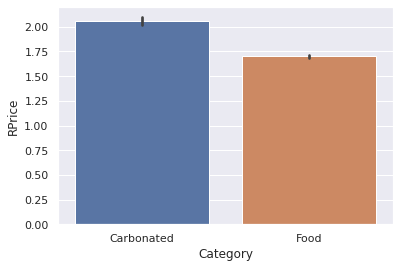

In [ ]:
# create data frames for carbonated and water categories
# df_carb = df.loc[df['Category'] == 'Carbonated']
df_food = df.loc[df['Category'] == 'Food']

# conduct t-test to test for signif
tc3, pc3 = ttest_ind(df_food['RPrice'], df_carb['RPrice'])
print(tc3, pc3)

# context 
from numpy import mean
t_3 = df[df['Category'].isin(['Carbonated', 'Food'])]
h_3 = sns.barplot(x = 'Category', y = 'RPrice', data = t_3, estimator = mean)
print(h_3)

### Hypothesis #3 Summary
- The above bar chart shows the average revenue per product for both carbonated drinks and food
- **Hypothesis #3 is retained** as the average revenue per cabonated beverage is **higher** than the average revenue per food product
 - This is a significant difference at a 95% confidence level | p < .01 

<br>
From here we can look at the food selection and options

##### **Food** | 111 Total Products

In [ ]:
# create df filtered for only food
food_df = df.loc[df['Category'] == 'Food']

# get counts for each product 
food_count_overview = food_df.groupby('Product').count()[['RPrice']]
food_count_overview['Total Sold'] = food_count_overview['RPrice']
food_count_overview = food_count_overview.drop(['RPrice'], axis=1)
food_count_overview = food_count_overview.sort_values(by = 'Total Sold', ascending=False)

# all total options
print(food_count_overview)

                                               Total Sold
Product                                                  
KitKat - Crisp Wafers                                 260
Wonderful Pistachios - Variety                        144
CheezIt - Original                                    138
SunChips Multigrain - Harvest Cheddar                 131
Robert Irvine's - Fit Crunch -  Chocolate Pea         121
...                                                   ...
Nature's Garden Trail Mix - Heart Healthy Mix           1
Nature's Garden Trail Mix - Omega 3                     1
Nature's Valley Chewy Granola Bar - Fruit & N           1
Nature's Valley Crunchy Granola Bar - Oats &            1
Larabar - Peanut Butter chocolate Chip                  1

[111 rows x 1 columns]


##### **Top Food Products** | Greater than 25 units sold to date
These are the food products that are the most popular and should be kept in the machines.

In [ ]:
food_greater_than_25 = food_count_overview[food_count_overview['Total Sold'] > 25]
print(food_greater_than_25)

                                               Total Sold
Product                                                  
KitKat - Crisp Wafers                                 260
Wonderful Pistachios - Variety                        144
CheezIt - Original                                    138
SunChips Multigrain - Harvest Cheddar                 131
Robert Irvine's - Fit Crunch -  Chocolate Pea         121
Oreo Mini                                             109
SunChips Multigrain - Salsa                           105
Takis - Hot Chilli Pepper & Lime                       96
Goldfish Baked - Cheddar                               91
Cheetos - Fleming Hot Crunchy                          83
Funyuns - Flaming Hot                                  82
SunChips Multigrain - Original                         72
Cheetos Flaming Hot Limon Crunchy                      64
Chesters Fries Flaming hot                             59
Kinder - Bueno - Crispy Creamy Chocolate               59
Good Health Ve

##### **Bottom Food Products** | Less than 25 units sold to date
These food products are not very popular and should be reconsidered. The products with only single digit sales should be removed, and products with double digit sales can be rotated in at specific locations upon request or if supply is short for other products.

In [ ]:
food_less_than_25 = food_count_overview[food_count_overview['Total Sold'] < 25]
print(food_less_than_25)

                                               Total Sold
Product                                                  
Ritz Bits Cheese                                       23
Mini Chips Ahoy                                        23
Cheetos - Crunchy                                      23
Popchips Potato - Sea Salt                             22
Snyder's of Hanover Pretzel Pieces - Honey Mu          20
...                                                   ...
Nature's Garden Trail Mix - Heart Healthy Mix           1
Nature's Garden Trail Mix - Omega 3                     1
Nature's Valley Chewy Granola Bar - Fruit & N           1
Nature's Valley Crunchy Granola Bar - Oats &            1
Larabar - Peanut Butter chocolate Chip                  1

[62 rows x 1 columns]


#### **Location Analysis**
> Location matters...but the products demanded changes by location

                                  Total Revenue
Location          Category                     
GuttenPlans       Carbonated            2241.00
EB Public Library Food                  1997.75
GuttenPlans       Food                  1972.25
Earle Asphalt     Food                  1005.00
Brunswick Sq Mall Food                   860.25
EB Public Library Non Carbonated         746.00
GuttenPlans       Non Carbonated         565.00
Brunswick Sq Mall Water                  533.50
EB Public Library Carbonated             524.00
Brunswick Sq Mall Carbonated             521.00
                  Non Carbonated         436.25
EB Public Library Water                  326.75
Earle Asphalt     Carbonated              85.50
                  Non Carbonated          64.00
                  Water                   33.00


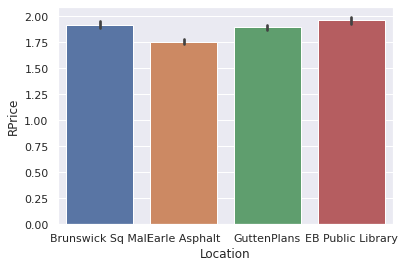

In [ ]:
# revenue overview for all locations
# wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

location_overview = df.groupby(['Location', 'Category']).sum()[['RPrice']]
location_overview['Total Revenue'] = location_overview['RPrice']
location_overview = location_overview.drop(['RPrice'], axis=1)
location_overview = location_overview.sort_values(by = 'Total Revenue', ascending=False)
print(location_overview)

# shows avg revenue but I want total revenue 
# issue with groups 
sns.barplot(x = 'Location', y = 'RPrice', data = df)

##### **Brunswick Sq Mall** | 2 Vending Machines
Brunswick Sq Mall - Mall with average foot traffic 7 days a week. Vending machine(s): 
> - BSQ Mall x1364
> - Zales & BSQ Mall x1366 - ATT

In [ ]:
# filter for Brunswick Sq Mall and get total revenue
mall = df.loc[df['Location'] == 'Brunswick Sq Mall']
mall_overview = mall.groupby("Category").sum()[['RPrice']]
mall_overview['Total Revenue'] = mall_overview['RPrice']
mall_overview = mall_overview.drop(['RPrice'], axis=1)
mall_overview = mall_overview.sort_values(by = 'Total Revenue', ascending=False)
print(mall_overview)

# get counts for each category (then calculate percent of total)
mall_count_overview = mall.groupby('Category').count()[['RPrice']]
mall_count_overview['Percent of Sales'] = round(mall_count_overview['RPrice'] / 1226 * 100,2)
mall_count_overview = mall_count_overview.drop(['RPrice'], axis=1)
mall_count_overview = mall_count_overview.sort_values(by = 'Percent of Sales', ascending=False)

print(mall_count_overview)

                Total Revenue
Category                     
Food                   860.25
Water                  533.50
Carbonated             521.00
Non Carbonated         436.25
                Percent of Sales
Category                        
Food                       43.88
Water                      23.33
Carbonated                 18.03
Non Carbonated             14.76


#### **Optimizing Brunswick Sq Mall**
The mall location makes up over half it's sales in **food** and **water**, so the stock of the vending machine should represent this. 
> - More food and water options, with the carbonated and non-carbonated options only being the most popular overall

Brunswick Mall has 2 vending machines, but does it **really need both**? 

First, I want to see if there is any difference in the product categories, as sometimes vending machines may have only drinks, only snacks or both...

In [ ]:
# create data frame for mall machine 'ATT'
mall_att = mall.loc[mall['Machine'] == 'BSQ Mall x1366 - ATT']
mall_att = mall_att.groupby("Category").sum()[['RPrice']]
mall_att['Total Revenue'] = mall_att['RPrice']
mall_att = mall_att.drop(['RPrice'], axis=1)
mall_att = mall_att.sort_values(by = 'Total Revenue', ascending=False)
print(mall_att)

# create data frame for mall machine 'Zales'
mall_zales = mall.loc[mall['Machine'] == 'BSQ Mall x1364 - Zales']
mall_zales = mall_zales.groupby("Category").sum()[['RPrice']]
mall_zales['Total Revenue'] = mall_zales['RPrice']
mall_zales = mall_zales.drop(['RPrice'], axis=1)
mall_zales = mall_zales.sort_values(by = 'Total Revenue', ascending=False)
print(mall_zales)

                Total Revenue
Category                     
Food                   345.25
Carbonated             284.75
Water                  228.25
Non Carbonated         200.50
                Total Revenue
Category                     
Food                   515.00
Water                  305.25
Carbonated             236.25
Non Carbonated         235.75


Both vending machines have all 4 categories, and low revenue, *but which one should they keep?*

### Hypothesis #4
The average product revenue for the mall 'ATT' machine is **equal to** the average product revenue for the mall 'Zales' machine.

The machine with the highest average revenue per product will be the one the mall keeps...

7.880272278936319 7.172869260118651e-15
AxesSubplot(0.125,0.125;0.775x0.755)


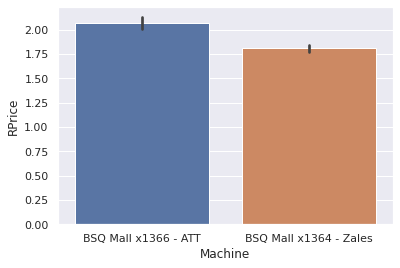

In [ ]:
# create data frames for carbonated and water categories
df_mall_a = df.loc[df['Machine'] == 'BSQ Mall x1366 - ATT']
df_mall_z = df.loc[df['Machine'] == 'BSQ Mall x1364 - Zales']

# conduct t-test to test for signif
tc4, pc4 = ttest_ind(df_mall_a['RPrice'], df_mall_z['RPrice'])
print(tc4, pc4)

# context 
from numpy import mean
t_4 = df[df['Machine'].isin(['BSQ Mall x1366 - ATT', 'BSQ Mall x1364 - Zales'])]
h_4 = sns.barplot(x = 'Machine', y = 'RPrice', data = t_4, estimator = mean)
print(h_4)

### Hypothesis #4 Summary
- The above bar chart shows the average revenue per product for each vending machines at the mall location
- **Hypothesis #4 is rejected** as the average revenue per product is **not the same** for each machine, there is a real difference.
 - It is a significant difference at a 95% confidence level | p < .01 

<br>
The mall should keep the 'ATT' machine and the 'Zales' machine can be removed and put at another location. 

##### **Earle Asphalt** | 1 Vending Machine
Earle Asphalt - A construction engineering firm that operates 5 days a week. Vending machine:
> - Earle Asphalt x1371

In [ ]:
# filter for Earle Asphalt and get total revenue
ea = df.loc[df['Location'] == 'Earle Asphalt']
ea_overview = ea.groupby("Category").sum()[['RPrice']]
ea_overview['Total Revenue'] = ea_overview['RPrice']
ea_overview = ea_overview.drop(['RPrice'], axis=1)
ea_overview = ea_overview.sort_values(by = 'Total Revenue', ascending=False)
print(ea_overview)

# get counts for each category (then calculate percent of total)
ea_count_overview = ea.groupby('Category').count()[['RPrice']]
ea_count_overview['Percent of Sales'] = round(ea_count_overview['RPrice'] / 676 * 100,2)
ea_count_overview = ea_count_overview.drop(['RPrice'], axis=1)
ea_count_overview = ea_count_overview.sort_values(by = 'Percent of Sales', ascending=False)

print(ea_count_overview)

                Total Revenue
Category                     
Food                   1005.0
Carbonated               85.5
Non Carbonated           64.0
Water                    33.0
                Percent of Sales
Category                        
Food                       87.43
Carbonated                  6.36
Non Carbonated              4.14
Water                       2.07


#### **Optimizing Earle Asphalt**
The Earle Asphalt location makes up the majority of its sales in **food**, with over 87% of sales being food products. Thus, the stock of the vending machine should represent this. 
> - Majority of options should be food, with the water, carbonated and non-carbonated options only being the most popular for this location

##### **Gutten Plans** | 1 Vending Machine
Gutten Plans - Frozen dough specialist company that operates 24/5. Vending machine:
> - GuttenPlans x1367

In [ ]:
# filter for GuttenPlans and get total revenue
gp = df.loc[df['Location'] == 'GuttenPlans']
gp_overview = gp.groupby("Category").sum()[['RPrice']]
gp_overview['Total Revenue'] = gp_overview['RPrice']
gp_overview = gp_overview.drop(['RPrice'], axis=1)
gp_overview = gp_overview.sort_values(by = 'Total Revenue', ascending=False)
print(gp_overview)

# get counts for each category (then calculate percent of total)
gp_count_overview = gp.groupby('Category').count()[['RPrice']]
gp_count_overview['Percent of Sales'] = round(gp_count_overview['RPrice'] / 2524 * 100,2)
gp_count_overview = gp_count_overview.drop(['RPrice'], axis=1)
gp_count_overview = gp_count_overview.sort_values(by = 'Percent of Sales', ascending=False)

print(gp_count_overview)

                Total Revenue
Category                     
Carbonated            2241.00
Food                  1972.25
Non Carbonated         565.00
                Percent of Sales
Category                        
Food                       47.62
Carbonated                 43.42
Non Carbonated              8.95


#### **Optimizing Gutten Plans**
The Gutten Plans location makes up over 90% of its sales in **food** and **carbonated** products. Thus the stock of the vending machine should represent this. 
> - Majority of options should be food and carbonated drinks, with non-carbonated options only being the most popular for this location
> - This location also does not sell any water products, so testing with the most popular water products can be done to see if they would be successful

##### **EB Public Library** | 1 Vending Machine
Public library that has high foot traffic 5-6 days a week. Vending machine:
> - EB Public Library x1380

In [ ]:
# filter for EB Public Library and get total revenue
eb = df.loc[df['Location'] == 'EB Public Library']
eb_overview = eb.groupby('Category').sum()[['RPrice']]
eb_overview['Total Revenue'] = eb_overview['RPrice']
eb_overview = eb_overview.drop(['RPrice'], axis=1)
eb_overview = eb_overview.sort_values(by = 'Total Revenue', ascending=False)
print(eb_overview)

# get counts for each category (then calculate percent of total)
eb_count_overview = eb.groupby('Category').count()[['RPrice']]
eb_count_overview['Percent of Sales'] = round(eb_count_overview['RPrice'] / 1834 * 100,2)
eb_count_overview = eb_count_overview.drop(['RPrice'], axis=1)
eb_count_overview = eb_count_overview.sort_values(by = 'Percent of Sales', ascending=False)

print(eb_count_overview)

                Total Revenue
Category                     
Food                  1997.75
Non Carbonated         746.00
Carbonated             524.00
Water                  326.75
                Percent of Sales
Category                        
Food                       59.81
Carbonated                 15.21
Non Carbonated             14.99
Water                       9.98


#### **Optimizing EB Public Library**
The EB Public Library location makes up close to 60% of it's sales in **food** products. Thus the stock of the vending machine should represent this. 
> - Majority of options should be food, with a selection of popular carbonated drinks and non-carbonated product options. As for water products only the most popular should be stocked for this location.


## **Recommendations**
### Overall
> **Space is limited** | Optimize the space used and customize the selection based on location
> - Condense product selection to meet consumer preferences to **increase revenue**
> - Balance selection and variety to **lower costs** for buying in bulk *(economy of scale)*
> - Locations where people work or spend lots of time tend to have more purchases
### Location Specific
> **Brunswick Sq Mall**
> - Keep only the 'ATT' vending machine
> - Allocate the majority of space for food and water options, with the carbonated and non-carbonated options only being for the most popular overall products
>
> **Earle Asphalt**
> - Majority of options should be food products
> - Water, carbonated and non-carbonated options only being the most popular for this location
>
> **Gutten Plans**
> - Majority of options should be food and carbonated drink products
>  - Non-carbonated options should only be the most popular for this location
> - Test with the most popular water products to see if this option is in demand
>
> **EB Public Library**
> - Majority of vending products should be food
> - Stock popular carbonated drinks and non-carbonated product options
> - Only the most popular water products should be stocked at this location